In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

# LEGEND

**figures**
Figure 1. Age vs Cholesterol scatter plot

Figure 2. Resting blood pressure vs Maximum heart rate achieved

Figure 3. K-Nearest-Neighbors graph



**tables**

Table 1. Tidy data

Table 2. Total data

Table 3. predictions

Table 4. Confusion Matrix



# Cleveland dataset analysis 

# Introduction
heart disease is becoming increasingly more common with 695,000 people dying from it every year in the US, according to the department of health heart disease and stroke prevention , and has been on the rise in the last couple of years (American Heart Association 2023). Because of this it is important to identify how someone might end up with heart disease and figuring out how we can lower the rate of heart disease. This brings us the the important question of how do people's existing health factors affect their chances of obtaining heart disease. With this project I will try and answer this question by correctly identifying which health factors puts you at risk of obtaining heart disease, more specifically if higher levels of a specific variable or lower values of a specific variable translates to a higher risk of heart disease. The dataset I will being using is from Cleveland located in the United States of America. I chose this specifically because the US has one of the highest rates of heart disease in the world. 




# Method & Results

In [2]:

set.seed(20)

project_data <- read_csv("https://raw.githubusercontent.com/yobrap/Dsci-Project/main/data/heart_disease/processed.cleveland.data", col_names = FALSE)

colnames(project_data) <- c("Age", "sex", "cp","Resting_blood_pressure", "Cholesterol", "fbs", "restecg", "Maximum_heart_rate", "exang", "oldpeak", "slope", "ca","thal", "Diseased")

project_data <- mutate(project_data, Diseased = as_factor(Diseased)) 
project_data <- mutate(project_data, Diseased = fct_recode(Diseased, disease = "1",
                                 disease = "2", 
                                 disease = "3",
                                 disease = "4",
                                 clean = "0"))


project_data <- select(project_data, Age, Cholesterol, Resting_blood_pressure, Maximum_heart_rate, Diseased)


head(project_data)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Cholesterol,Resting_blood_pressure,Maximum_heart_rate,Diseased
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,233,145,150,clean
67,286,160,108,disease
67,229,120,129,disease
37,250,130,187,clean
41,204,130,172,clean
56,236,120,178,clean


table 1. Tidy data

In order to effectively start this analysis of the data I first used the read_csv function to load the data. However, since we had no column names I had to use col_names = false to effectively load the data into a readable format. I then had to manually rename the column names as it had no names in the actual dataset

After loading the data into a readable format I then cleaned the data. I filtered it so I only had the columns that I was interested in. Furthermore, I also used mutate to rename and reorganize the num column which states whether they had a disease or not. Instead of the confusing numbering they used in the original data I decided to name numbers 1 - 4 disease and 0 clean as it helps clear up the data and makes it less confusing to read. 


In [3]:
project_data_summarize <- project_data |> group_by(Diseased) |>
                          summarize(Total_cases = n())
project_data_summarize

Diseased,Total_cases
<fct>,<int>
clean,164
disease,139


table 2. Total data

Here I counted the total number of cases of people that did not have heart disease and the total number of people that did have heart disease. I decided to do this as it give me a summary of how many people in the entire data set had heart disease compared to how many didn't have heart disease

# Graph 1

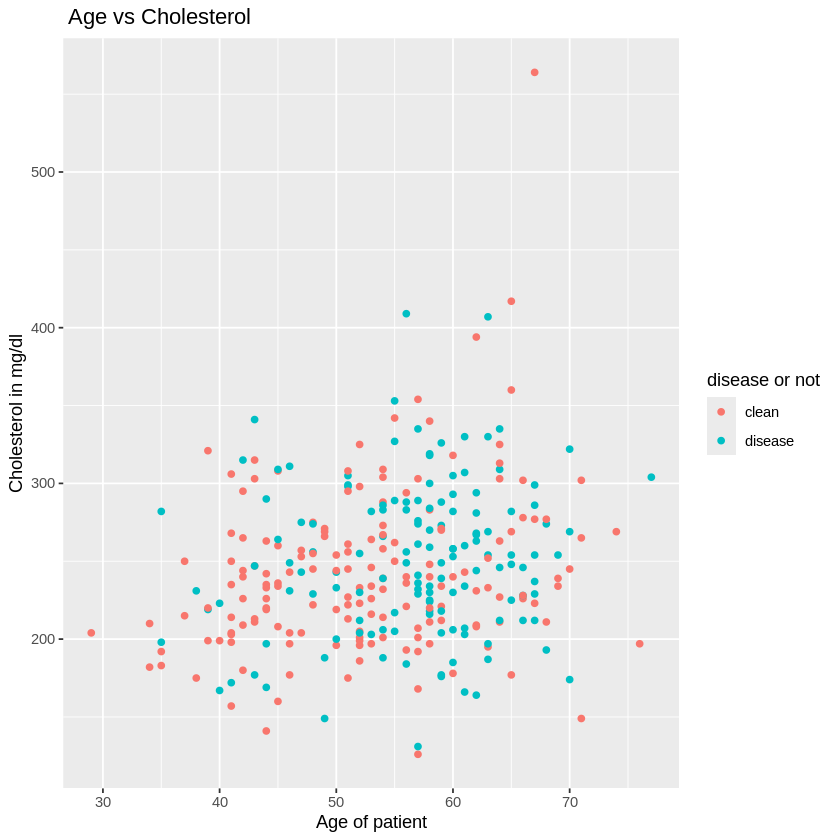

In [4]:
project_graph <- ggplot(project_data, aes(x = Age, y = Cholesterol, color = Diseased)) + 
            geom_point() + 
            labs(x = "Age of patient", y = "Cholesterol in mg/dl", color = "disease or not") +
            ggtitle(" Age vs Cholesterol")
            

project_graph
                  

Figure 1. Age vs Cholesterol scatter plot

This table shows the relationship of heart disease relative to age and cholesterol. From this graph we can see that age and cholesterol seems to play a factor in whether or not someone develops heart disease. The conclusion from the Graph also corresponds to information provided from the National Institute on Aging and from the Mayo foundation for Medical Education and Research (2023) which both conclude that higher age and cholesterol plays a role in heart disease

# Graph 2

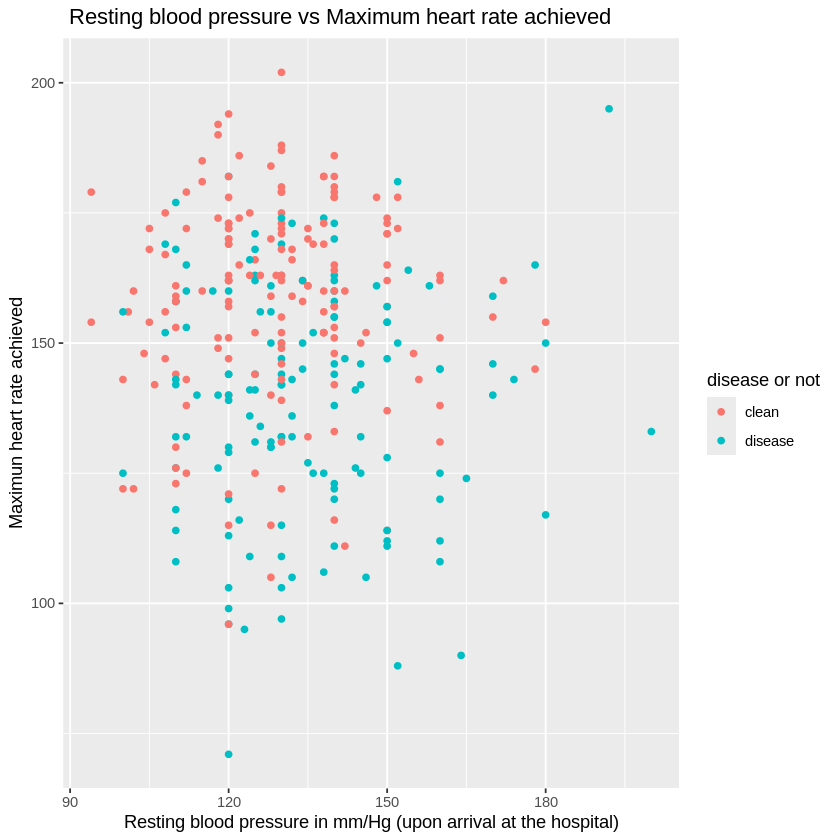

In [5]:
 project_graph <- ggplot(project_data, aes(x = Resting_blood_pressure, y = Maximum_heart_rate, color = Diseased)) + 
            geom_point() + 
            labs(x = "Resting blood pressure in mm/Hg (upon arrival at the hospital)",
                 y = "Maximun heart rate achieved", color = "disease or not") +
                ggtitle(" Resting blood pressure vs Maximum heart rate achieved")

project_graph

figure 2. Resting blood pressure vs Maximum heart rate achieved

This table shows the relationship of heart disease relative to resting blood pressure and maximum heart rate achieved. It would seem that the lower your heart rate and lower your resting blood pressure the higher your chances of getting heart disease. The conclusion from this graph also further corresponds to findings from the Mayo foundation for Medical Education (2023) which states that the higher your blood pressure the greater chances you have of obtaining heart disease. Furthermore, research from The Journal of the American Heart Association (2014) states that elevated heart rate does also increase the risk of heart disease

 I plotted the data onto a scatter plot which gave me an idea of if higher levels of the variable corresponded to more people having the disease. for example, if I see more disease dots higher up in age then seeing more dots on the lower end. 

### Splitting The Data and Vfold 

In [6]:
set.seed(2000)
heart_split <- initial_split(project_data, prop = 0.75, strata = Diseased)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

Here I split the data into training and testing data and used 75% of the data for training and 25% for testing. I hoped that 75% of the data would be enough to produce an accurate model and 25% would be good enough to give me a proper evaluation of the performance.

In [7]:
data_vfold <- vfold_cv(heart_train, v = 5, strata = Diseased)

Here I used the vfold function for my data

### Finding the best K

In [8]:
set.seed(1000)

k_vals <- tibble(neighbors = seq(from = 1, to = 20))

data_recipe <- recipe(Diseased ~ ., data = heart_train) |>
   step_scale(all_predictors())  |>
   step_center(all_predictors())


knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_data <- workflow() |>
       add_recipe(data_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = data_vfold, grid = k_vals) |>
       collect_metrics()


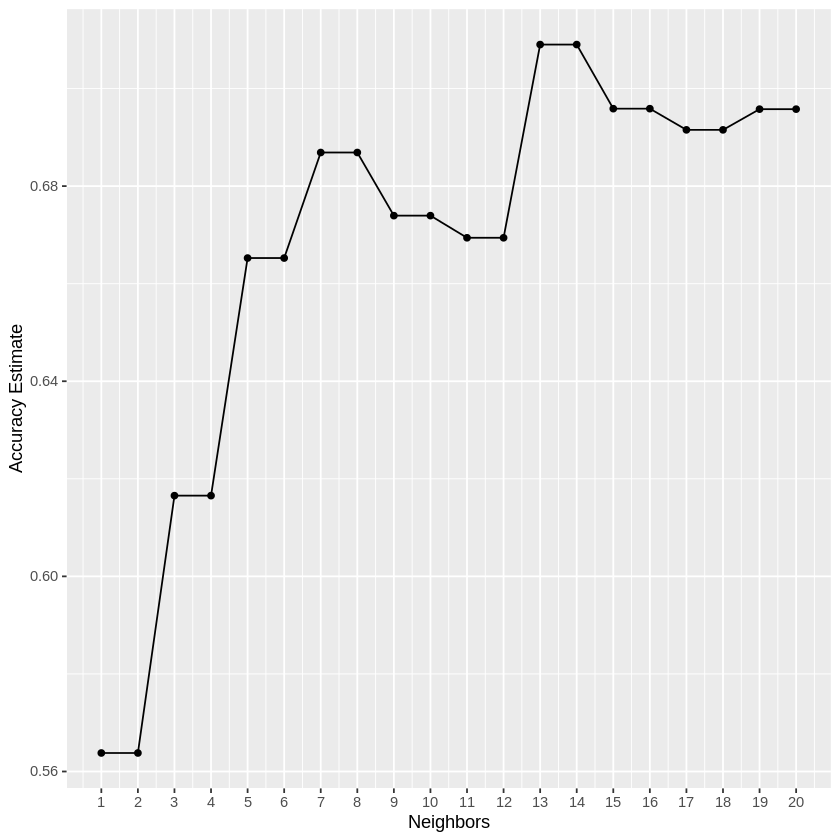

In [9]:
set.seed(1000)

accuracies <- knn_data |>
    filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 20, by = 1)) 

accuracy_versus_k



Figure 3. K-Nearest-Neighbors graph

The code above is for trying to find the best K-nearest neighbor value to use with our code. From the graph above we can see that K = 13 or K = 14 is the best K to use with our model since its accuracy estimate is higher than all the other points I used the training data to find the best neighbor for my data set which I then used to preform the actual analysis of my data, using filter to filter for the accuracy which is what we are interested in. 

### Running the KNN process with K = 13

In [10]:
set.seed(1000)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 13) |>
       set_engine("kknn") |>
       set_mode("classification")

data_workflow <- workflow() |> 
    add_recipe(data_recipe) |>
    add_model(knn_spec) |>
    fit(data = heart_train)

data_prediction <- predict(data_workflow, heart_test) |> 
    bind_cols(heart_test)

head(data_prediction)

.pred_class,Age,Cholesterol,Resting_blood_pressure,Maximum_heart_rate,Diseased
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
disease,67,286,160,108,disease
clean,53,203,140,155,disease
disease,56,256,130,142,disease
clean,44,263,120,173,clean
clean,52,199,172,162,clean
clean,48,275,130,139,clean


Table 3. predictions

In [11]:
set.seed(1000)

summarize_data <- data_prediction |>
    conf_mat(truth = Diseased, estimate = .pred_class)

summarize_data

          Truth
Prediction clean disease
   clean      29       9
   disease    12      26

Table 4. Confusion Matrix

out of the total  of 76 it appears as if 72% of them was predicted correctly. The Percision is 68% and the recall is 74% 

### DISCUSSION 

From what I found from my project it does seem like these factors do have an effect on whether someone will or will not have heart disease. From the model I can confirm that the health factors that I am currently investigating does contribute to heart disease. However, because the accuracy of our model is quite low and correctly identifying heart disease is a matter of life and death a 28% margin of error is quite high. I can conclude that although the health factors that I am using for the model does contribute to heart disease, the model that I have created is not accurate enough to be used in reality.

Finding that these health factors do contribute to heart disease is what I expected to find because of the preliminary research I did. However, what did surprise me is the relatively low accuracy that the model produced. I expected the model to produce a higher accuracy rating than it actually did because of the strong relation these health factors have with heart disea according to the current researchse.

although already known, these findings could still have an impact as it further reinforces the importance of these health factors in relation to heart disease. These findings illustrate the importance of keeping yourself healthy and how high amounts of these factors can lead to a increase chances of obtaining heart disease. Hopefully, the findings of this study can help people be more self aware and actively work to reduce these factors and lessen the chances of themselves obtaining heart disease

future questions this study could lead to is asking how many other factors could potentially lead to heart disease. This study was relatively small only containing 4 predictors. Although this study looked at some big ones future questions could lead to the study of less well known causes of heart disease. Furthermore, more questions into if ones psychological or mental state could potentially affect heart disease is also a question this could lead to. In this study I only based factors on physical attributes but, more study into psychological and mental factors is a good question to go into in the future
future questions this study could lead to is asking how many other factors could potentially lead to heart disease. This study was relatively small only containing 4 predictors. Although this study looked at some big ones future questions could lead to the study of less well known causes of heart disease. Furthermore, more questions into if ones psychological or mental state could potentially affect heart disease is also a question this could lead to. In this study I only based factors on physical attributes but, more 


# Works Cited

Department of Health. Heart Disease and Stroke Prevention. (n.d.). https://health.ny.gov/diseases/cardiovascular/heart_disease/#:~:text=About%20695%2C000%20people%20die%20of,Americans%20have%20a%20heart%20attack. 

Cardiovascular deaths saw steep rise in U.S. during first year of the COVID-19 pandemic. www.heart.org. (2023, May 23). https://www.heart.org/en/news/2023/01/25/cardiovascular-deaths-saw-steep-rise-in-us-during-first-year-of-the-covid-19-pandemic 

Heart health and aging | National Institute on Aging. (n.d.). https://www.nia.nih.gov/health/heart-health/heart-health-and-aging 

Mayo Foundation for Medical Education and Research. (2023, January 11). High cholesterol. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800#:~:text=Your%20body%20needs%20cholesterol%20to,to%20flow%20through%20your%20arteries. 

Mayo Foundation for Medical Education and Research. (2023b, November 28). How high blood pressure can affect the body. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/high-blood-pressure/art-20045868#:~:text=High%20blood%20pressure%20forces%20the,heart%20attack%20and%20heart%20failure. 

Ho, J. E., Larson, M. G., Ghorbani, A., Cheng, S., Coglianese, E. E., Vasan, R. S., & Wang, T. J. (2014, May 8). Long-term cardiovascular risks associated with an elevated heart rate: The Framingham Heart Study. Journal of the American Heart Association. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4309047/ 